In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider



# 1. Introduction

![Alt text](https://cdn.britannica.com/37/217837-050-78FB6AAF/American-economist-Paul-Samuelson-1970.jpg?w=385)

### A Brief Biography of Paul Samuelson

Paul Anthony Samuelson (May 15, 1915 – December 13, 2009) was an American economist who was the first American to win the Nobel Memorial Prize in Economic Sciences. When awarding the prize in 1970, the Swedish Royal Academies stated that he "has done more than any other contemporary economist to raise the level of scientific analysis in economic theory".
Samuelson was one of the most influential economists of the latter half of the 20th century. In 1996, he was awarded the National Medal of Science. Samuelson considered mathematics to be the "natural language" for economists and contributed significantly to the mathematical foundations of economics with his book Foundations of Economic Analysis.

### Role in Economic Theory

Samuelson contributed to many areas of economic theory through powerful mathematical techniques that he employed essentially as puzzle-solving devices. His Foundations of Economic Analysis (1947) provides the basic theme of his work, with the universal nature of consumer behaviour seen as the key to economic theory. Samuelson studied such diverse fields as the dynamics and stability of economic systems, the incorporation of the theory of international trade into that of general economic equilibrium, the analysis of public goods, capital theory, welfare economics, and public expenditure. Of particular influence has been his mathematical formulation of the interaction of multiplier and accelerator effects and, in consumption analysis, his development of the theory of revealed preference.
One of his key models is the so-called multiplier-accelerator model (also known as the Samuelson-Hicks business cycle model), which describes fluctuations in national income depending on consumption, investment, and government spending.

### Overview of the Multiplier-Accelerator Model

The multiplier–accelerator model (also known as Hansen–Samuelson model) is a macroeconomic model which analyzes the business cycle. This model was developed by Paul Samuelson, who credited Alvin Hansen for the inspiration. This model is based on the Keynesian multiplier, which is a consequence of assuming that consumption intentions depend on the level of economic activity, and the accelerator theory of investment, which assumes that investment intentions depend on the pace of growth in economic activity.

# 2. Theoretical part

### Basic equations of the model:

The multiplier–accelerator model can be stated for a closed economy as follows: First, the market-clearing level of economic activity is defined as that at which production exactly matches the total of government spending intentions, households' consumption intentions and firms' investing intentions.

 **National Income:** 
$$ Y_{t} = g_{t} + C_{t} + I_{t} $$
$ Y_{t} $ - national income \
$ g_{t} $ - government spending \
$ C_{t} $ - consumption \
$ I_{t} $ - investments 

then an equation to express the idea that households' consumption intentions depend upon some measure of economic activity, possibly with a lag:

**Consumption function:**
$$ C_{t} = \alpha Y_{t-1} $$
$ \alpha $ - marginal cost of consumption \
$ Y_{t-1} $ - the income from the previous period 

then an equation that makes firms' investment intentions react to the pace of change of economic activity:

**Function of investments (accelerator effect):**
$$ I_{t} = \beta [C_{t} - C_{t-1}] $$
$ \beta $ - the accelerator coefficient – sensitivity of investments to growth in demand (consumption)

and finally a statement that government spending intentions are not influenced by any of the other variables in the model. For example, the level of government spending could be used as the unit of account:

**Government spending (constant):**
$$ g_{t} = 1 $$

where $ Y_{t} $ is national income, $ g_{t} $ is government expenditure, $ C_{t} $ is consumption expenditure, $ I_{t} $ is induced private investment, and the subscript $ t $ is time. Here we can rearrange these equations and rewrite them as a second-order linear difference equation:

**dynamic difference form:**
$$ Y_{t} = 1 + \alpha (1 + \beta )Y_{t-1} - \alpha \beta Y_{t-2} $$

Samuelson demonstrated that there are several kinds of solution path for national income to be derived from this second order linear difference equation.This solution path changes its form, depending on the values of the roots of the equation or the relationships between the parameter $ \alpha $ and $ \beta $

The multiplier effect is represented by $ \alpha $ – it captures how an increase in income increases consumption. The accelerator effect is represented by $ \beta $ – it shows how an increase in consumption leads to increased investment.

# 3. Implementation in Jupyter Lab

To begin with, we implement the national income identity as a Python function and visualize how the components interact over time.

In [5]:
def national_income(g_t, C_t, I_t):
    return g_t + C_t + I_t

print(national_income(50, 80, 30))

160


Next, we define a version of the function that works with time series data and plot the components.

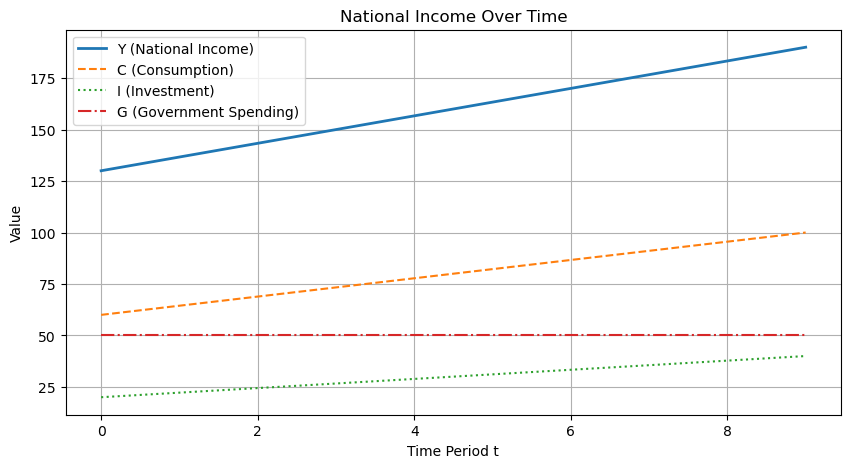

In [9]:
def national_income_seies(g, C, I):
    return g + C + I

T = 10
g = np.full(T, 50) # Creates an array of length T
C = np.linspace(60, 100, T)
I = np.linspace(20, 40, T)

Y = national_income_seies(g, C, I)

plt.figure(figsize=(10, 5))
plt.plot(Y, label = 'Y (National Income)', linewidth = 2)
plt.plot(C, label='C (Consumption)', linestyle='--')
plt.plot(I, label='I (Investment)', linestyle=':')
plt.plot(g, label='G (Government Spending)', linestyle='-.')
plt.title('National Income Over Time')
plt.xlabel('Time Period t')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

#### 1. Simulation of values with fixed parameters.
This part of the project demonstrates how the national income is calculated and how it evolves over time as the components change.

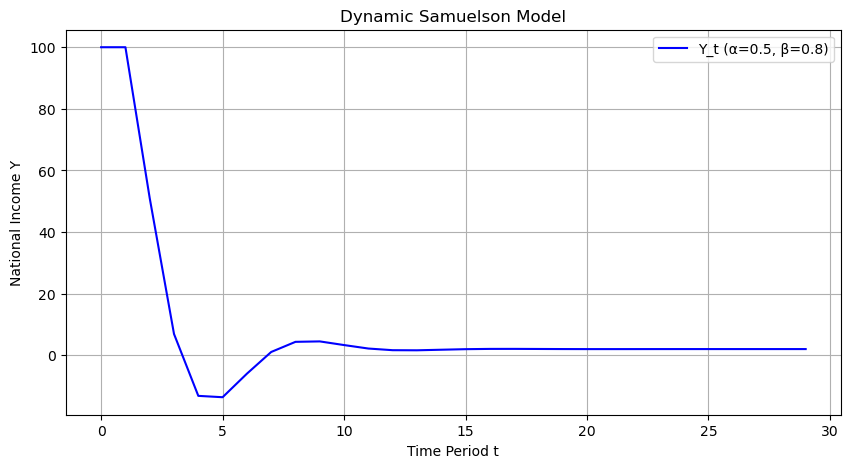

In [3]:
def simulate_dynamic_income(alpha, beta, Y0=100, Y1=100, T=30):
    Y = np.zeros(T)
    Y[0] = Y0
    Y[1] = Y1
    for t in range(2, T):
        Y[t] = 1 + alpha * (1 + beta) * Y[t - 1] - alpha * beta * Y[t - 2]
    return Y

# Adjust alpha and beta manually below:
alpha = 0.5
beta = 0.8

# Run simulation
Y = simulate_dynamic_income(alpha, beta)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(Y, label=f'Y_t (α={alpha}, β={beta})', color='blue')
plt.title('Dynamic Samuelson Model')
plt.xlabel('Time Period t')
plt.ylabel('National Income Y')
plt.grid(True)
plt.legend()
plt.show()

#### 2. Multiple Scenario Research
__Example – multiple curves on one graph:__

The code runs a simulation function simulate_dynamic_income(alpha=..., beta=0.8) for different values of alpha (0.3, 0.5, 0.7) and plots the resulting time series Y on the same graph. This is a sensitivity analysis to explore how the system responds when alpha changes, while beta is fixed at 0.8.

__Interpretation of the Graph:__

All curves start at a high value (around 100), suggesting an initial condition or shock.

* Drop & Oscillation: After the initial peak, each curve drops sharply and then oscillates before stabilizing near a steady value.

* Impact of Alpha:

    - Lower alpha (e.g. 0.3, blue line) leads to quicker damping and faster stabilization.

    - Higher alpha (e.g. 0.7, green line) results in larger oscillations and slower convergence.

    - This implies that alpha controls the inertia or responsiveness of the system – a higher alpha might reflect a stronger influence of past  values or slower adjustment.

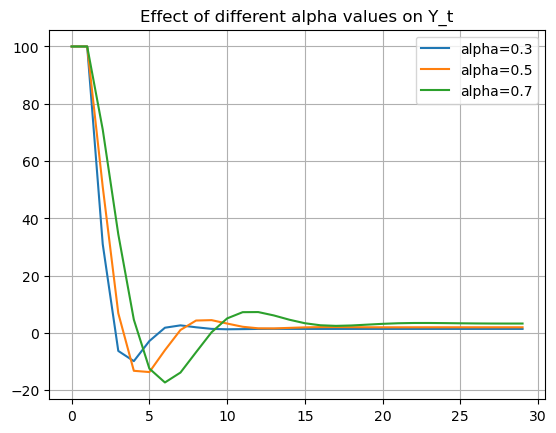

In [4]:
for alpha in [0.3, 0.5, 0.7]:
    Y = simulate_dynamic_income(alpha=alpha, beta=0.8)
    plt.plot(Y, label=f'alpha={alpha}')

plt.title("Effect of different alpha values on Y_t")
plt.legend()
plt.grid(True)
plt.show()


__This script generates a stability heatmap for a dynamic model by testing many combinations of alpha and beta values.__

__Interpretation of the Heatmap:__
* The red region (left/lower side of the map) shows combinations of alpha and beta that lead to a stable system.
* The blue region (right/upper side) indicates parameter values where the model becomes unstable.
* The transition boundary (from red to blue) shows critical thresholds where the system shifts from stable to unstable behavior.

* Low values of both alpha and beta tend to produce stable outcomes — the system returns to equilibrium over time.
* As either alpha or beta increases, the likelihood of instability also increases — the system begins to diverge or oscillate uncontrollably.
* Economically, this suggests that high internal inertia (alpha) or strong external shocks (beta) can both drive the system into instability if not controlled.

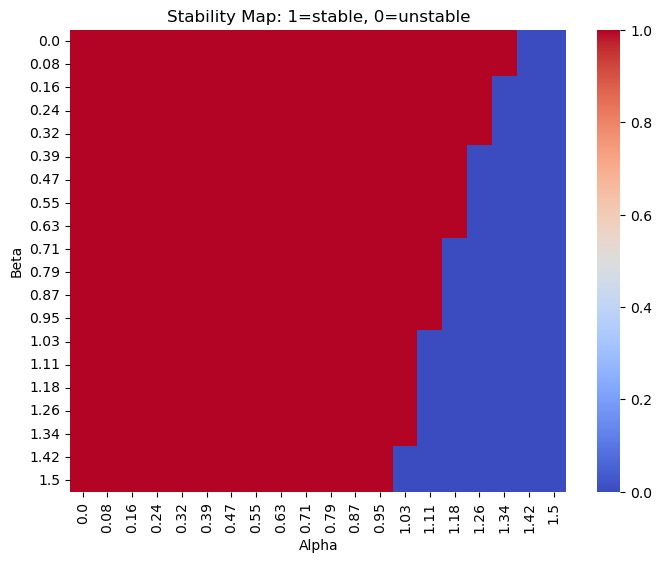

In [11]:
import seaborn as sns

# Generate lists of alpha and beta values
alphas = np.linspace(0, 1.5, 20)
betas = np.linspace(0, 1.5, 20)
# Matrix that will hold the results for stability
heatmap = np.zeros((len(alphas), len(betas)))

# We calculate the model dynamics for each combination of alpha and beta
for i, alpha in enumerate(alphas):
    for j, beta in enumerate(betas):
        Y = simulate_dynamic_income(alpha, beta) # generate Y_t
        if np.max(np.abs(Y)) < 1e6:  # условие за стабилност
            heatmap[j, i] = 1  # stable model
        else:
            heatmap[j, i] = 0  # unstable model
            
# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap, xticklabels=np.round(alphas, 2), yticklabels=np.round(betas, 2), cmap='coolwarm')
plt.title('Stability Map: 1=stable, 0=unstable')
plt.xlabel('Alpha')
plt.ylabel('Beta')
plt.show()


# 4. Types of model behavior

In [2]:
def plot_behavior(alpha, beta, title, color='black'):
    Y = simulate_dynamic_income(alpha, beta)
    plt.plot(Y, label=f'α={alpha}, β={beta}', color=color)
    plt.title(title)
    plt.xlabel('Time (t)')
    plt.ylabel('Income Y_t')
    plt.grid(True)
    plt.legend()
   

### - Damped oscillations (damped cycles)

* Characteristics: $ Y_t $ oscillates, but with each step the amplitude decreases.

* Mathematically: __complex roots with modulus < 1__

* Typical for:

    * average values of $ \alpha $ (0.3 – 0.6)

    * moderate values of $ \beta $ (0.4 – 0.9)

What the Graph and Code Show:
The graph visualizes the dynamic behavior of income $ Y_t $ over time, using the function simulate_dynamic_income() with parameters:

* $ \alpha $ = 0.4 (persistence)

* $ \beta $ = 0.5 (external influence)

These values are within the range that typically generates __damped oscillations__ — meaning the system fluctuates, but the oscillations gradually decrease and converge to a stable level.

__Observed Behavior:__
* The curve starts at a high initial value (near 100), drops sharply, and then oscillates slightly.
* The amplitude of the oscillations decreases over time, and the system settles into equilibrium.
* This is a classic example of damped convergence, where the system responds to a shock but stabilizes without diverging.

__Mathematical Interpretation:__
* Damped oscillations occur when the model’s characteristic roots are complex but have a modulus less than 1, meaning each oscillation is smaller than the previous one.
* This behavior indicates stability with inertia — the system remembers past values but gradually returns to equilibrium.

__Economic Interpretation:__
The parameters $ \alpha $ = 0.4 , $ \beta $ = 0.5 suggest a system with __moderate memory__ and __moderate external pressure__.
* After a shock, income $ Y_t $ does not adjust instantly but moves toward a stable level through a series of diminishing cycles.
* This is typical of many real-world economic systems where adjustment takes time, such as consumer spending, investment responses, or inventory corrections.

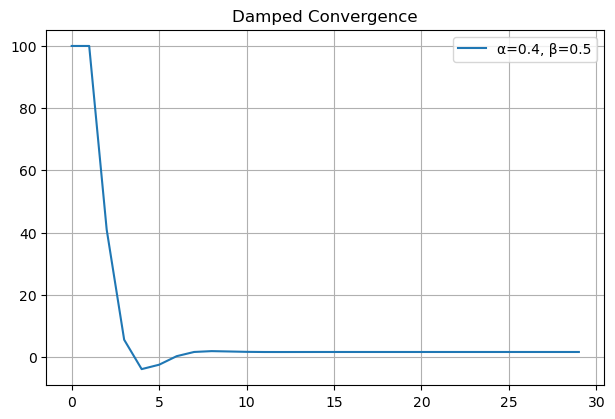

In [45]:
plt.figure(figsize=(12, 8))
# Damped
plt.subplot(2, 2, 1)
plot_behavior(alpha=0.4, beta=0.5, title='Damped Convergence')

plt.tight_layout()
plt.show()

### - Stable convergence (monotonic)

* $ Y_t $ аpproaches equilibrium without oscillations
* Mathematical: __real roots < 1 in absolute value__
* Typical for:
    * small values of $ \alpha $ (≤ 0.3)
    * any $ \beta $

__Observed Behavior:__
* The system starts at a high value (near 100) and quickly decreases.
* There are no visible cycles — just a smooth, one-directional path to a steady state.
* This is a typical example of __stable monotonic convergence__.

__Mathematical Interpretation:__
* This behavior is associated with real roots of the characteristic equation that are less than 1 in absolute value.
* It reflects a non-oscillatory, exponentially declining response.

__Economic Interpretation:__
* A low value of $ \alpha $ = 0.2 implies a system with very little inertia — past values have minimal impact on current outcomes.
* $ \beta $ = 0.4 introduces moderate external influence, but not enough to destabilize the system.
* As a result, income adjusts quickly and smoothly back to equilibrium after a disturbance — typical of highly adaptive systems such as automated control mechanisms or responsive policy models.



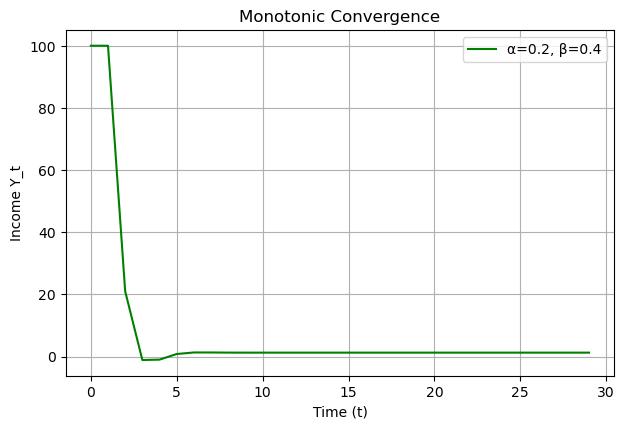

In [65]:
plt.figure(figsize=(12, 8))

# Monotonic Stability
plt.subplot(2, 2, 3)
plot_behavior(alpha=0.2, beta=0.4, title='Monotonic Convergence', color='green')

plt.tight_layout()
plt.show()


### - Cyclicity / constant oscillations

* $ Y_t $ oscillates with almost the same amplitude
* Mathematical: __modulus of complex roots $ \approx $ 1__
* Typical for:
    *  $ \alpha $ about 0.8
    *  $ \beta $ about 1.0

__Observed Behavior:__
* The curve oscillates above and below zero with no sign of damping or convergence.
* The amplitude of the waves stays nearly the same throughout the time period.
* This is characteristic of a __cyclical system__ that does not settle, which can be problematic in control systems or economic models.

__Mathematical Interpretation:__
* This behavior is linked to complex roots with modulus close to 1, meaning the system’s inherent tendency to oscillate is not counteracted by decay.
* The system keeps “repeating” itself in cycles without damping.

__Economic Interpretation:__
* A high $ \alpha $ and high $ \beta $ combination means:
    * The system has __strong inertia__ (heavy dependence on its past).
    * It is __highly sensitive to external forces__.
* These conditions can produce __cyclical fluctuations in income__ that persist indefinitely, much like business cycles or economic booms and busts.
* Such behavior is often undesirable unless managed, as it implies __instability without divergence__ — the system is not exploding, but it also never settles.



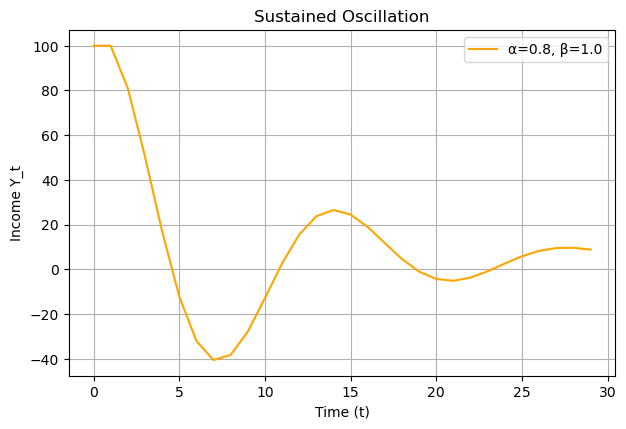

In [64]:
plt.figure(figsize=(12, 8))

# Cyclic
plt.subplot(2, 2, 2)
plot_behavior(alpha=0.8, beta=1.0, title='Sustained Oscillation', color='orange')

plt.tight_layout()
plt.show()

### - Explosive growth (instability)

This plot demonstrates a scenario where the income variable $ Y_t $ grows without bound — a clear case of instability.
The parameters used are:
* $ \alpha $ = 1.2 (very high persistence)
* $ \beta $ = 1.2 (strong external shock or influence)
These values push the system into a state of explosive dynamics, where outputs rapidly increase over time.

__Observed Behavior:__
* The curve starts near 100 and quickly accelerates upward, especially after time step 20.
* The growth becomes exponential, reaching values in the billions.
* This behavior reflects uncontrolled divergence.

__Mathematical Interpretation:__
* At least one root of the system’s characteristic equation has modulus greater than 1, meaning the system is unstable.
* The influence of past values and external forces is too strong to allow the system to stabilize.

__Economic Interpretation:__
* A combination of high internal inertia $ \alpha $ and strong external stimulus $ \beta $ creates runaway behavior.
* Economically, this could represent hyperinflation, asset bubbles, or runaway debt — where the system lacks correcting mechanisms.
* Such dynamics are dangerous and signal the need for structural reform, policy intervention, or damping mechanisms to regain control.

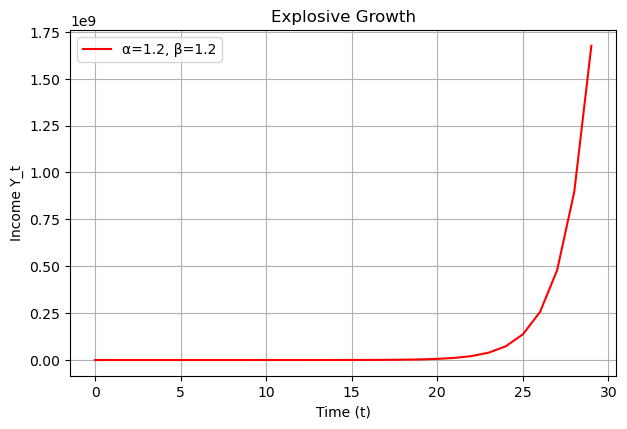

In [66]:
plt.figure(figsize=(12, 8))

# Unstable
plt.subplot(2, 2, 4)
plot_behavior(alpha=1.2, beta=1.2, title='Explosive Growth', color='red')

plt.tight_layout()
plt.show()

This plot compares four types of dynamic behavior of national income $ Y_t $ , each simulated under different combinations of $ \alpha $ and $ \beta $. __The Y-axis is limited (80–120)__ to highlight early dynamics before major divergence occurs.

| Alpha (α) | Beta (β) |   Observed Behavior   | Color in Plot|
|---------|--------|---------------------|-------------|
| 0.2       | 0.4      | Monotonic Convergence | 🟢 Green   |
| 0.4       | 0.5      | Damped Oscillation    | 🔵 Blue        |
| 0.8       | 1.0      | Cyclic Oscillation    | 🟠 Orange      |
| 1.2       | 1.2      | Unstable / Explosive  | 🔴 Red         |

__1. Monotonic Convergence (Green – $\alpha$=0.2, $\beta$=0.4):__
* Behavior: Smooth, non-oscillating decline toward equilibrium.
* Interpretation: The economy quickly adjusts to shocks with no cycles.
* Condition: __Low inertia and moderate external influence.__
* Stability: __Stable__

__2. Damped Oscillation (Blue –  $\alpha$=0.4, $\beta$=0.5):__
* Behavior: Oscillations that fade over time, converging to equilibrium.
* Interpretation: A typical real-world adjustment path where responses gradually settle.
* Condition: __Moderate inertia and moderate shocks.__
* Stability: __Stable__

__3. Sustained Oscillation (Orange – $\alpha$=0.8, $\beta$=1.0):__
* Behavior: Persistent cycles with nearly constant amplitude.
* Interpretation: The system never settles; resembles endless business cycles.
* Condition: __High inertia and strong external force.__
* Stability: __Borderline (cyclic), not convergent__

__4. Explosive Growth (Red – $\alpha$=1.2, $\beta$=1.2):__
Behavior: Rapid, uncontrolled increase in $ Y_t $– “blows up”.
* Interpretation: System spirals out of control due to excessive internal memory and external pressure.
* Condition: __Very high $\alpha$ and $\beta$.__
* Stability: __Unstable__

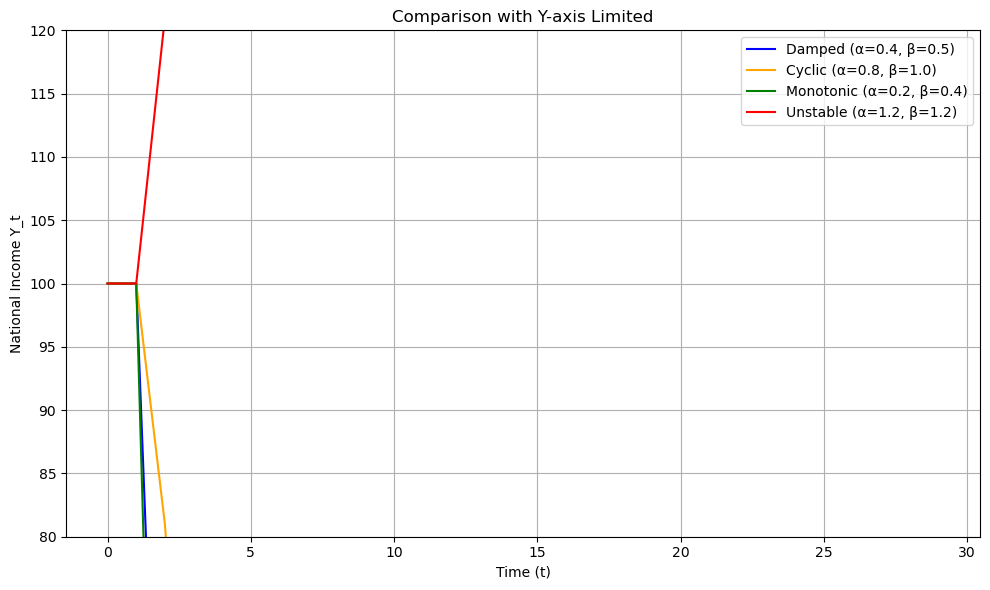

In [3]:

def simulate_dynamic_income(alpha, beta, Y0=100, Y1=100, T=30):
    Y = np.zeros(T)
    Y[0], Y[1] = Y0, Y1
    for t in range(2, T):
        Y[t] = 1 + alpha * (1 + beta) * Y[t - 1] - alpha * beta * Y[t - 2]
    return Y

# Изчисляваме кривите за четирите типа поведение
Y_damped = simulate_dynamic_income(alpha=0.4, beta=0.5)
Y_cyclic = simulate_dynamic_income(alpha=0.8, beta=1.0)
Y_monotonic = simulate_dynamic_income(alpha=0.2, beta=0.4)
Y_unstable = simulate_dynamic_income(alpha=1.2, beta=1.2)

# Начало на графиката
plt.figure(figsize=(10, 6))

# Изобразяваме всяка крива с цвят и етикет
plt.plot(Y_damped, label='Damped (α=0.4, β=0.5)', color='blue')
plt.plot(Y_cyclic, label='Cyclic (α=0.8, β=1.0)', color='orange')
plt.plot(Y_monotonic, label='Monotonic (α=0.2, β=0.4)', color='green')
plt.plot(Y_unstable, label='Unstable (α=1.2, β=1.2)', color='red')

# Ограничаваме оста Y за по-детайлно сравнение на стабилните случаи
plt.ylim(80, 120)

# Оформление и етикети
plt.title('Comparison with Y-axis Limited')
plt.xlabel('Time (t)')
plt.ylabel('National Income Y_t')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


This type of analytical visualization is critical for interpreting economic stability and for policy simulation, where parameters can be chosen deliberately to avoid instability.
These four graphs represent typical behaviors of the Samuelson model under different combinations of $ \alpha $ and $ \beta $.

# 5. Conclusion

### Importance of the model today

The Samuelson model remains relevant in modern economics for several key reasons:

* __Foundational teaching tool:__ It provides an intuitive yet mathematically rigorous introduction to business cycle dynamics, making it ideal for students and early researchers.

* __Basis for more complex models:__ Many modern macroeconomic models, including DSGE (Dynamic Stochastic General Equilibrium) models, are inspired by or expand upon the logic of the multiplier-accelerator framework.

* __Illustrates instability:__ The model clearly shows how seemingly minor parameter shifts can destabilize an economy. This remains crucial for understanding phenomena like financial crises or policy shocks.

* __Useful in simulations:__ With simple implementation, the model helps policymakers and analysts run scenario analyses to explore short-term and long-term effects of fiscal policy.

* __Framework for digital experiments:__ With programming tools like Jupyter Lab, the model can now be used interactively for simulations and visual explanations, making it highly accessible in both research and education.